## Task 2: Prediction using unsupervised Machine Learning

objective : From the given "Iris" dataset,predict the optimum number of clusters and reresent it visually.

Author:- Sahid Akhil 

language :python


dataset link:https://bit.ly/3kXTdox

## Importing the required Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Load the iris dataset

In [6]:
link = "iris.csv"

In [46]:
iris=pd.read_csv(link)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
iris.drop(["Id"],axis=1,inplace=True)

In [48]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.shape

(150, 5)

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
## checking for null values

iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
iris.drop_duplicates(inplace=True)

## Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris["Species"]=le.fit_transform(iris["Species"])
iris["Species"].value_counts()


1    50
2    49
0    48
Name: Species, dtype: int64

## Comparing the PetalLength Cm and petalWidth Cm

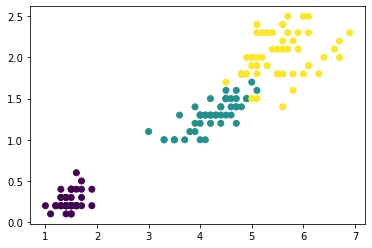

In [28]:
plt.scatter(iris["PetalLengthCm"],iris["PetalWidthCm"],c=iris.Species.values)

In [29]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


## data  visualization

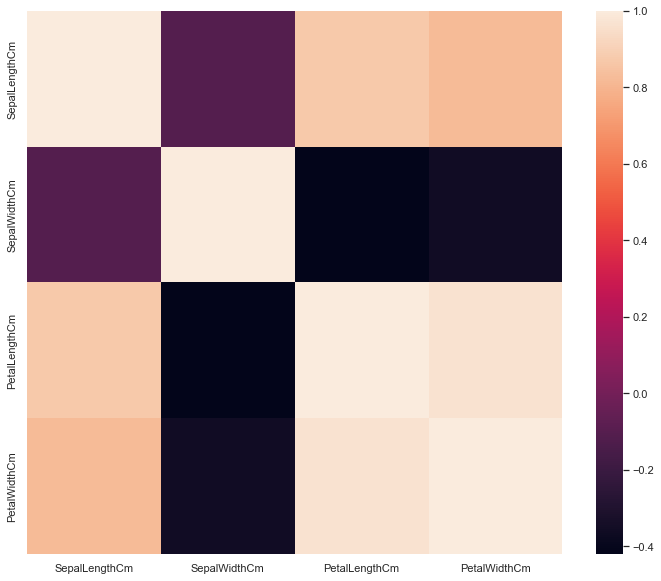

In [97]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(iris.corr());

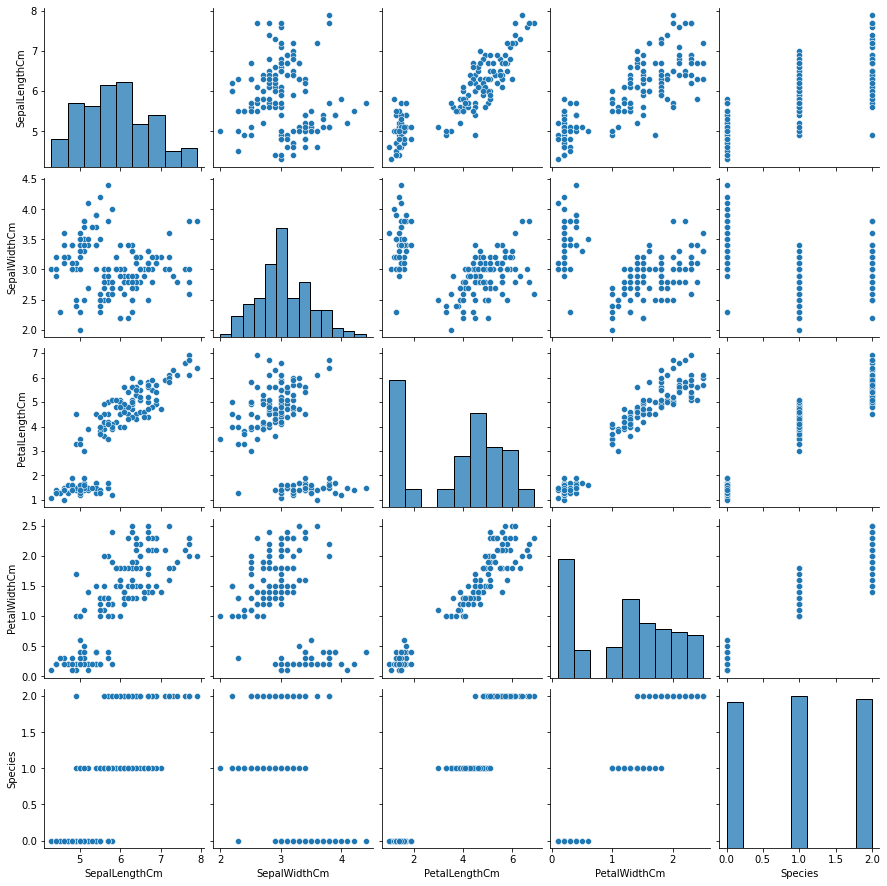

In [36]:
sns.pairplot(iris)

      It can be easily spotted that the species mainly depends on the petal length and the petal width of the leaf.

In [50]:
x=iris.iloc[:,[0,1,2,3]].values

## Elbow method using WCSS (within-Cluster-sum-of-squares) 

In [99]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    Kmeans=KMeans(n_clusters =i, init="k-means++",random_state= 0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)
    ## here Kmeans.inertia_ returns wcss for the model
wcss

C:\Users\amraf\Desktop\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.56163015873017,
 38.930963049671746,
 34.190687924796634,
 30.063874432733137,
 27.84235606060608]

     Inertia measures how well a dataset was clustered by K-Means. 
     It is calculated by measuring the distance between each data  point and its centroid, squaring this distance, 
     and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

## Using Elbow graph to find the optimum number of Clusters

C:\Users\amraf\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


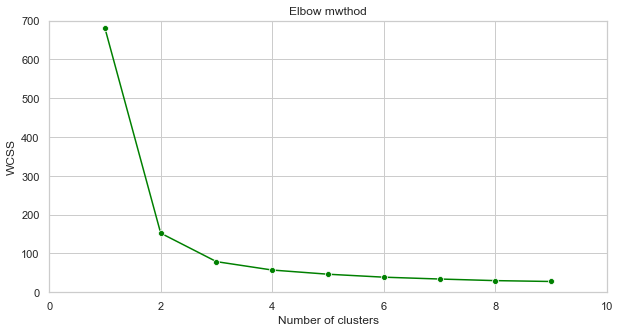

In [62]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.lineplot(range(1,10),wcss,marker="o",color="green")
plt.title("Elbow mwthod")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.xlim([0,10])
plt.ylim([0,700])
plt.show();


     The optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value 
     decreases.

## training the k-means model on the dataset

In [100]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualizing Clusters

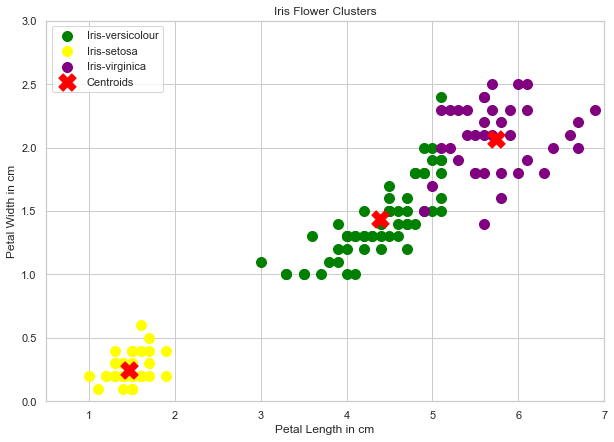

In [92]:
fig=plt.figure(figsize=(10,7))
plt.title("Clusters with centroids",fontweight="bold",fontsize="20")
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],s = 100, c = 'purple', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='X', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.xlim([0.5,7])
plt.ylim([0,3])
plt.legend()

        Hence we can come into conclusion that the predicted graph is a bit similar to the actual graph.